# The Nyquist-Shannon sampling theorem

In the previous section, we saw that aliasing occurs between frequencies related by an integer multiple of the sampling rate $f_s$:
$$
f' = f + \color{#EC2830}{k \cdot f_s}.
$$

The bad news is that we can never avoid this: it's a byproduct of representing continuous signals by discrete samples.

The good news it that if we're careful, we can ensure that aliasing effects do not corrupt our signals (or analysis)!
This is what the Nyquist-Shannon theorem is all about: establishing the conditions under which sampling is okay.

In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cycler
import matplotlib.path as path
import matplotlib.patches as patches
from matplotlib.transforms import Bbox
import warnings
warnings.simplefilter('ignore')

from matplotlib.animation import FuncAnimation
import matplotlib.style
matplotlib.style.use('bauhaus')

np.random.seed(20200101)

colors = [_['color'] for _ in list(matplotlib.rcParams['axes.prop_cycle'])]

**Aside: what's a 'theorem'?**

Readers who don't spend a lot of time with mathematical terminology are often confused by the word "theorem", and think it's equivalent to the word "theory".
It is not!

A "theorem" is a mathematical fact that logically follows from a set of assumptions.

Some other vocabulary for mathematical facts that you might not be familiar with:

- **lemma**: a fact used to help prove a larger theorem.
- **corollary**: a fact that follows immediately from a theorem.

## Sampling pure tones and combinations

The sampling theorem is most easily understood in terms of pure tones (sinusoids).
While most any signal you encounter out in the world is unlikely to be a pure sinusoid, it turns out that under very mild conditions, **every** continuous signal can be expressed as a **combination of sinusoids**.
By **combination**, we specifically mean a weighted sum, possibly with different phase offsets for each frequency:

$$
\begin{align*}
x(t) =& A_1 \cdot \cos(2\pi \cdot f_1 \cdot t + \phi_1) \;+\\
&A_2\cdot \cos(2\pi \cdot f_2\cdot  t + \phi_2) \;+\\
&A_3\cdot \cos(2\pi \cdot f_3\cdot  t + \phi_3) + \cdots
\end{align*}
$$

When we sample a signal to produce $x[n]$, we can equivalently think of sampling each sinusoid first and then summing the results:
$$
\begin{align*}
x[n] =& A_1\cdot \cos\left(2\pi \cdot f_1 \cdot \frac{n}{f_s} + \phi_1\right) \;+\\
& A_2\cdot \cos\left(2\pi \cdot f_2\cdot \frac{n}{f_s} + \phi_2\right) \;+\\
& A_3\cdot \cos\left(2\pi \cdot f_3\cdot  \frac{n}{f_s} + \phi_3\right) + \cdots
\end{align*}
$$

Reasoning about sampling in this way will simplify things quite a bit.  If we can understand what sampling does for pure sinusoids, then we can extend that knowledge to general signals!
Note that we don't need to know the specific values for $A_i$ or $\phi_i$; these quantities will generally be unknown.
It suffices to know that they exist.

Proving that (continuous) signals can be expressed as a combination of sinuoids is a bit out of scope for us here, but we will show in a later chapter that this holds in the discrete case: every discrete signal $x[n]$ can be expressed as a weighted sum of discrete (sampled) sinusoids!

## Band-limited sampling

A signal $x(t)$ is **band-limited** if it can be expressed as a combination (weighted sum) of pure sinusoids whose frequencies lie between some minimum frequency $f_-$ and some maximum frequency $f_+ \geq f_-$.
The size of this *band* of frequencies, 
$$
f_+ - f_-
$$
is known as the **bandwidth** of the signal.

Another way to think of band-limiting is that any sinusoid with frequency $f < f_-$ or $f > f_+$ has no weight in the combination that produces $x(t)$. Its corresponding amplitude $A_f$ must be 0.

The basic idea of the Nyquist-Shannon theorem is that if the sampling rate $f_s$ is sufficiently large (compared to the bandwidth of the signal), then aliasing can't hurt us: aliases must have zero amplitude!

## The Nyquist-Shannon sampling theorem

We can now formally state the sampling theorem due to [Harry Nyquist](https://en.wikipedia.org/wiki/Harry_Nyquist) and [Claude Shannon](https://en.wikipedia.org/wiki/Claude_Shannon).
(We'll actually state a simpler form of their theorem that's sufficient for our needs.)

**Nyquist-Shannon Theorem:** If $x(t)$ band-limited to the range $f_- \dots f_+$, then any sampling rate $f_s \geq f_+ - f_-$ is sufficient to prevent aliasing.

### Proof of the theorem

Pick any frequency $f$, which will have aliasing frequencies of the form $f' = f + k \cdot f_s$ for integer values $k$.
Because the space between aliases is at least $f_s$, and the bandwidth of the signal is at most $f_s$, any aliasing frequency $f'$ must reside outside the frequency range of $x(t)$ as depicted below.

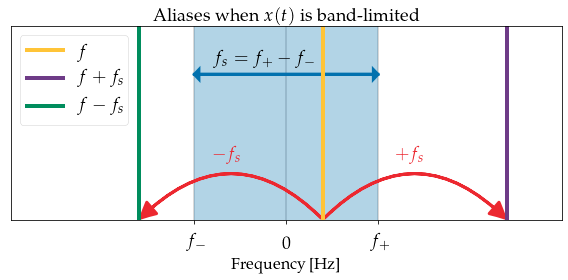

In [3]:
## Spectrum plot here
plt.figure(figsize=(8, 4))
ax = plt.gca()
ax.axvspan(-5, 5, alpha=0.3)

ax.arrow(-5, 0.75, 10-0.25, 0, head_width=0.05, head_length=0.25, color=colors[0], linewidth=3)
ax.arrow(5, 0.75, -10+0.25, 0, head_width=0.05, head_length=0.25, color=colors[0], linewidth=3)
ax.text(-4, 0.8, r'$f_s = f_+ - f_-$', size=18);

ax.axvline(2, color=colors[2], label='$f$')
a2 = patches.FancyArrowPatch((2.,0.0), (12.,0.0), connectionstyle="angle3,angleA=45,angleB=-45",  arrowstyle='simple, head_width=15, head_length=15',
                            color=colors[1], linewidth=3)
ax.add_patch(a2)

a3 = patches.FancyArrowPatch((2,0.0), (-8,0.0), connectionstyle="angle3,angleA=-45,angleB=45",  arrowstyle='simple, head_width=15, head_length=15',
                            color=colors[1], linewidth=3)
ax.add_patch(a3)

ax.text(6, 0.3, r'$+f_s$', color=colors[1], size=18);
ax.text(-4, 0.3, r'$-f_s$', color=colors[1], size=18);

ax.axvline(12, color=colors[4], label='$f + f_s$')
ax.axvline(-8, color=colors[5], label='$f - f_s$')

ax.set_xlim([-15, 15])
ax.set_yticks([])
ax.set_ylim([0, 1])
ax.set_xticks([-5, 0, 5])
ax.xaxis.set_ticklabels(['$f_-$', 0, '$f_+$'])
ax.legend(loc='upper left')
ax.set_title('Aliases when $x(t)$ is band-limited')
ax.set_xlabel('Frequency [Hz]');

As a result, the discrete sampled signal $x[n]$ will depend only on those frequencies within the band limits $f_- < f < f_+$, which cannot be aliases of each other.

# Band-limiting in practice

The Nyquist-Shannon theorem tells us how to choose a sampling rate, provided we know the band limits of the signal(s) we'd like to sample.
But how do we ensure that $x(t)$ is actually band-limited?

In hardware analog-to-digital converters (ADCs), this is done by using an analog circuit to filter the continuous signal and remove any frequencies above $f_+$ prior to sampling.
If you've ever seen a tone knob on an electric guitar, the principle is very much the same.

## Setting the bandwidth

At a first glance, the Nyquist-Shannon theorem might suggest to set $f_- = 0$ and $f_+$ to some reasonable maximum frequency, e.g. for audio, the upper range of human hearing (about 20000 Hz).
Unfortunately, this approach won't work.

To see why, consider the two signals plotted below: one has a frequency of 5 Hz, and the other has a frequency of -5 Hz:
$$
\begin{align*}
x_1(t) &= \cos\left(2\pi \cdot 5 \cdot t\right)\\
x_2(t) &= \cos\left(2\pi \cdot (-5) \cdot t\right).
\end{align*}
$$
Can you tell which is which?

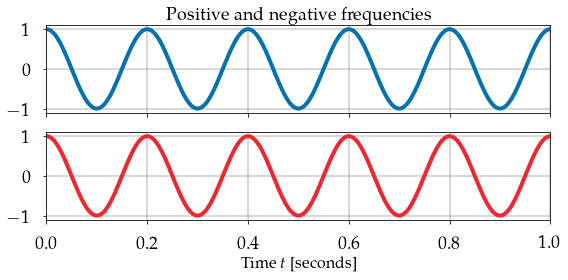

In [4]:
## Plot a cosine: positive or negative frequency?

fs = 1000
f0 = 5
f1 = -f0
t = np.linspace(0, 1, num=fs, endpoint=False)

x1 = np.cos(2 * np.pi  * f0 * t)
x2 = np.cos(2 * np.pi  * f1 * t)

plt.figure(figsize=(8, 4))
ax = plt.subplot(2,1,1)
plt.plot(t, x1, label='$f_0 = {}$ Hz'.format(f0), color=colors[0])
ax.tick_params(labelbottom=False)
plt.title('Positive and negative frequencies');

plt.subplot(2,1,2, sharex=ax, sharey=ax)
plt.plot(t, x2, label='$f_0 = {}$ Hz'.format(f1), color=colors[1])
plt.xlim([0, 1])
plt.xlabel('Time $t$ [seconds]');

The answer is: no!  These two frequencies produce identical signals.
In general, any wave with a negative frequency can be equivalently represented as a wave with positive frequency and a different phase.

The situation with negative frequency gets a bit trickier when signals can be complex-valued.
In that case, negative frequency *can* be distinguished from positive frequency, in exactly the same way that clockwise and counter-clockwise rotation can be distinguished from each other.

However, we'll only be dealing with real-valued signals here.

In [5]:
%%capture
# Draw a 2-pane animation of the moving point, and the wave being traced out horizontally and vertically
# Plot a circle, inscribed right triangle, angle, and sine and cosine markers
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

fig = plt.figure()

n_frames = 360

ax = plt.subplot(2, 2, 3)

angle = np.pi / 3
x, y = np.cos(angle), np.sin(angle)

circ = patches.Ellipse((0, 0), 2, 2, facecolor='w', edgecolor='k', linewidth=5)
ax.add_patch(circ)

arc = patches.Wedge((0, 0), 0.25, theta1=0, theta2=angle * 180 / np.pi, facecolor=colors[3])
ax.add_patch(arc)

hypotenuse = ax.plot([x, x], [0, y], linewidth=4, color=colors[2])[0]
xline = ax.plot([0, x], [0, 0], color=colors[1])[0]
yline = ax.plot([0, x], [0, y], marker='.', markersize=25, linewidth=4)[0]

plt.xlim([-1.25, 1.25])
plt.ylim([-1.25, 1.25]);
plt.xlabel('$x$')
plt.ylabel('$y$');

# Draw the y wave
t = np.linspace(0, 2 * np.pi, endpoint=False, num=1000)

ax_y = plt.subplot(2,2,4, sharey=ax)
ax_y.axhline(0, color='k', linewidth=2)
ax_y.plot(t, np.sin(t), color=colors[2], alpha=0.5)
vert_line = ax_y.plot([angle, angle], [0, y], color=colors[2], label=r'$\sin(\theta)$')[0]
ax_y.tick_params(labelleft=False)
plt.legend(loc='lower left')
ax_y.set_xlabel(r'$\theta$')
ax_y.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax_y.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
ax_y.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

# Draw the x wave
ax_x = plt.subplot(2,2,1, sharex=ax)
ax_x.axvline(0, color='k', linewidth=2)
ax_x.plot(np.cos(t), t, color=colors[1], alpha=0.5)
horiz_line = ax_x.plot([0, x], [angle, angle], color=colors[1], label=r'$\cos(\theta)$')[0]
plt.legend(loc='upper left')
ax_x.tick_params(labelbottom=False)
ax_x.set_ylabel(r'$\theta$')
ax_x.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax_x.yaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
ax_x.yaxis.set_major_formatter(plt.FuncFormatter(format_func))


def init():
    return arc, hypotenuse, xline, yline, vert_line, horiz_line

def animate(t):
    angle = 2 * np.pi * t / n_frames
    x, y = np.cos(angle), np.sin(angle)
    hypotenuse.set_data([x, x], [0, y])
    xline.set_data([0, x], [0, 0])
    yline.set_data([0, x], [0, y])
    vert_line.set_data([angle, angle], [0, y])
    horiz_line.set_data([0, x], [angle, angle])
    arc.set_theta2(angle * 180 / np.pi)
    return arc, hypotenuse, xline, yline, vert_line, horiz_line

animation = FuncAnimation(fig, animate, init_func=init,
                               frames=n_frames, interval=20, blit=True)

For cosine waves, this is just the symmetry property from chapter 1:
$$
\cos(-\theta) = \cos(\theta),
$$
which implies
$$
\cos\left(2\pi \cdot (-f)\cdot t + \phi\right) = \cos\left(2\pi \cdot f \cdot t - \phi\right).
$$
For sine waves, there is an anti-symmetry property, which we can combine with the phase inversion property:
$$
\sin(-\theta) = -\sin(\theta) = \sin(\theta - \pi),
$$
which implies
$$
\sin\left(2\pi \cdot (-f) \cdot t + \phi\right) = \sin\left(2\pi \cdot f \cdot t + \pi - \phi\right).
$$

If we wanted to filter out negative frequencies (i.e., set $f_- = 0$), then we must necessarily also filter out positive frequencies as well, because $f$ and $-f$ are indistinguishable from each other.
Put another way, for any frequency $f$ that we want to keep, we must also keep $-f$, so our band limits must be symmetric around 0.

## Putting it all together

The symmetry argument above tells us that we must have $f_- = -f_+$.  This leads to the more common formula for the sampling rate in the Nyquist-Shannon theorem:
$$
f_s \geq 2\cdot f_+,
$$
because $f_+ - f_- = f_+ - (-f_+) = 2\cdot f_+$.

Alternatively, for a fixed sampling rate $f_s$, the highest frequency that can be measured without aliasing artifacts is $f_s / 2$, also known as the **Nyquist frequency** (for sampling rate $f_s$).

For audio applications, we typically want $f_+$ to be sufficiently large to capture the audible range, which for humans, generally spans $30$ to $20000$ Hz.
This suggests a sampling rate $f_s \geq 2\cdot f_+ \approx 40000$.
Combining this with a few various technological constraints resulted in the standard rate $f_s = 44100$ Hz for compact disc quality audio, and which is still commonly used today.